In [75]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy.stats import kstest, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

style = """
<style>
    .dataframe { 
        font-size: 12px;
    }
</style>
"""
display(HTML(style))  

def print_tabulate(df: pd.DataFrame):
    html = df.to_html(classes = "dataframe", float_format = "%.2f", index = False)
    display(HTML(html))

########################################## Punto 1 ##########################################
#358
## Entidades 
# Las entidades a estudiar vienen siendo cada una de las dependencias registradas en la
# base de datos (typed_df.index). Y los nombres de sus trabajadores, sus áreas de trabajo
# sus sueldos y sus fechas de registro, corresponden a los atributos de cada una de las entidades

typed_df = pd.read_csv("csv/typed_uanl.csv")

In [13]:
########################################## Punto 2 ##########################################

## Estadísticas descriptivas por Sueldo Neto (datos no agrupados; datos totales)
# display(HTML(f"<h3>Sueldo neto</h3>"))
# sueldo_maximo = typed_df["Sueldo Neto"].max()
# sueldo_minimo = typed_df["Sueldo Neto"].min()
# sueldo_promedio = typed_df["Sueldo Neto"].mean()
# sueldo_desviacion = typed_df["Sueldo Neto"].std()
# df_maximo = pd.DataFrame([sueldo_maximo], columns = ["Sueldo Neto"])
# df_minimo = pd.DataFrame([sueldo_minimo], columns = ["Sueldo Neto"])
# df_promedio = pd.DataFrame([sueldo_promedio], columns = ["Sueldo Neto"])
# df_desviacion = pd.DataFrame([sueldo_desviacion], columns = ["Sueldo Neto"])
# display(HTML(f"Mínimo:"))
# print_tabulate(df_maximo)
# display(HTML(f"Máximo:"))
# print_tabulate(df_minimo)
# display(HTML(f"Promedio:"))
# display(HTML(f"{sueldo_promedio:.2f}"))
# display(HTML(f"Desviación estándar:"))
# display(HTML(f"\n{sueldo_desviacion:.2f}"))
# print("\n")

#############

## Estadísticas descriptivas por Fecha (datos agrupados por conteo de observaciones)
# display(HTML(f"<h3>Fecha</h3>"))
# Filtrado2 = typed_df.groupby(["Fecha"]).size().reset_index(name = "Conteo")
# idx_max = Filtrado2["Conteo"].idxmax()
# idx_min = Filtrado2["Conteo"].idxmin()
# row_min = Filtrado2.loc[[idx_min]]
# row_max = Filtrado2.loc[[idx_max]]
# promedio_Fecha = Filtrado2["Conteo"].mean()
# desviacion_Fecha = Filtrado2["Conteo"].std()
# display(HTML(f"Mínimo:"))
# print_tabulate(row_min)
# display(HTML(f"Máximo:"))
# print_tabulate(row_max)
# display(HTML(f"Promedio:"))
# display(HTML(f"{promedio_Fecha:.2f}"))
# display(HTML(f"Desviación estándar:"))
# display(HTML(f"{desviacion_Fecha:.2f}"))
# print("\n")

#############

## Estadísticas descriptivas por Tipo (datos agrupados por conteo de observaciones)
# display(HTML(f"<h3>Tipo</h3>"))
# Filtrado3 = typed_df.groupby(["Tipo"]).size().reset_index(name = "Conteo")
# idx_max = Filtrado3["Conteo"].idxmax()
# idx_min = Filtrado3["Conteo"].idxmin()
# row_min = Filtrado3.loc[[idx_min]]
# row_max = Filtrado3.loc[[idx_max]]
# promedio_Tipo = Filtrado3["Conteo"].mean()
# desviacion_Tipo = Filtrado3["Conteo"].std()
# display(HTML(f"Mínimo:"))
# print_tabulate(row_min)
# display(HTML(f"Máximo:"))
# print_tabulate(row_max)
# display(HTML(f"Promedio:"))
# display(HTML(f"{promedio_Tipo:.2f}"))
# display(HTML(f"Desviación estándar:"))
# display(HTML(f"{desviacion_Tipo:.2f}"))
# print("\n")

#############

## Estadísticas descriptivas por Nombre (datos agrupados por conteo de observaciones)
# display(HTML(f"<h3>Nombre</h3>"))
# Filtrado4 = typed_df.groupby(["Nombre"]).size().reset_index(name = "Conteo")
# idx_max = Filtrado4["Conteo"].idxmax()
# idx_min = Filtrado4["Conteo"].idxmin()
# row_min = Filtrado4.loc[[idx_min]]
# row_max = Filtrado4.loc[[idx_max]]
# promedio_nombres = Filtrado4["Conteo"].mean()
# desviacion_nombres = Filtrado4["Conteo"].std()
# display(HTML(f"Mínimo:"))
# print_tabulate(row_min)
# display(HTML(f"Máximo:"))
# print_tabulate(row_max)
# display(HTML(f"Promedio:"))
# display(HTML(f"{promedio_nombres:.2f}"))
# display(HTML(f"Desviación estándar:"))
# display(HTML(f"{desviacion_nombres:.2f}"))

Sueldo Neto
147051.59


Sueldo Neto
175.41


Fecha,Conteo
01/07/23,11423


Fecha,Conteo
01/12/20,14890


Tipo,Conteo
OTRO,12190


Tipo,Conteo
FACULTAD,274527


Nombre,Conteo
AARON GUILLERMO REYES PACHECO,1


Nombre,Conteo
JUAN ANTONIO RAMIREZ HERNANDEZ,97


Nombre,Año,Sueldo Neto
REYES S. TAMEZ GUERRA,2019,86245.29
SANTOS GUZMAN LOPEZ,2020,1046972.92
REYES S. TAMEZ GUERRA,2021,1143632.22
REYES S. TAMEZ GUERRA,2022,1158449.85
SANTOS GUZMAN LOPEZ,2023,1321187.87
SANTOS GUZMAN LOPEZ,2024,111868.46


Nombre,Año,Sueldo Neto
BRENDA AZENETH PICAZO GARCIA,2019,8620.34
ALBERTO IVAN RAMIREZ SILVA,2020,17126.78
MARIA BEATRIZ VILLAGOMEZ GONZALEZ,2021,113746.01
JUAN IGNACIO SANCHEZ PLACENCIA,2022,103900.01
MARTHA BEATRIZ RAMOS TRISTAN,2023,20310.13
KARINA GUADALUPE BARRON REYES,2024,8166.10


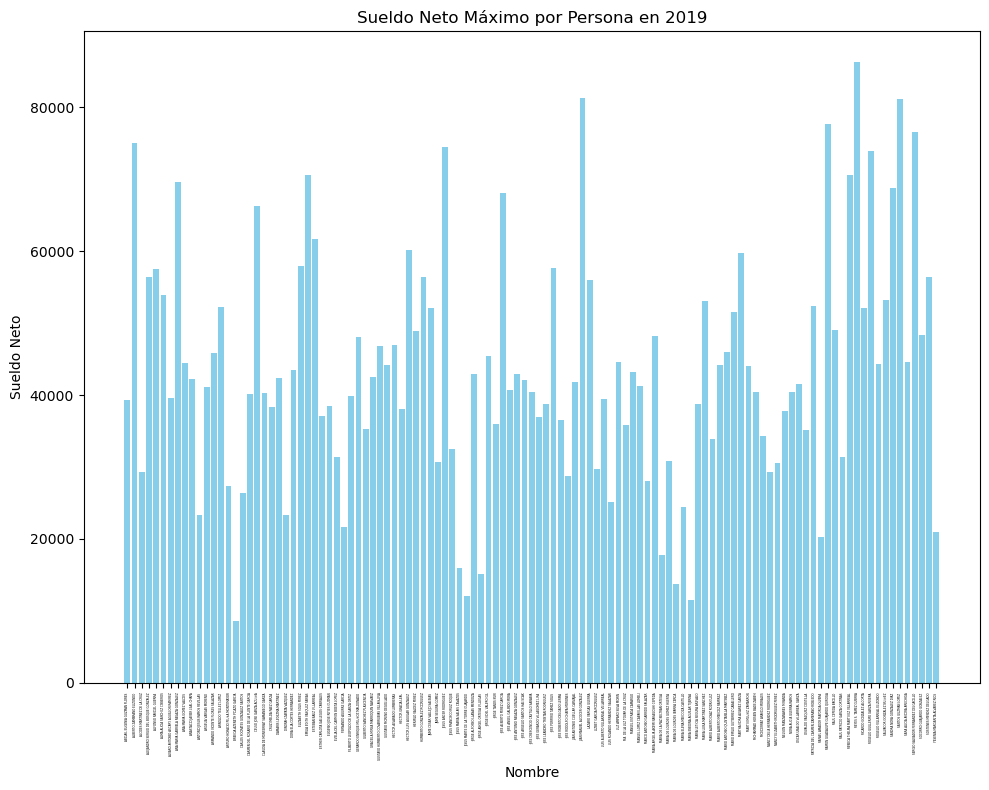

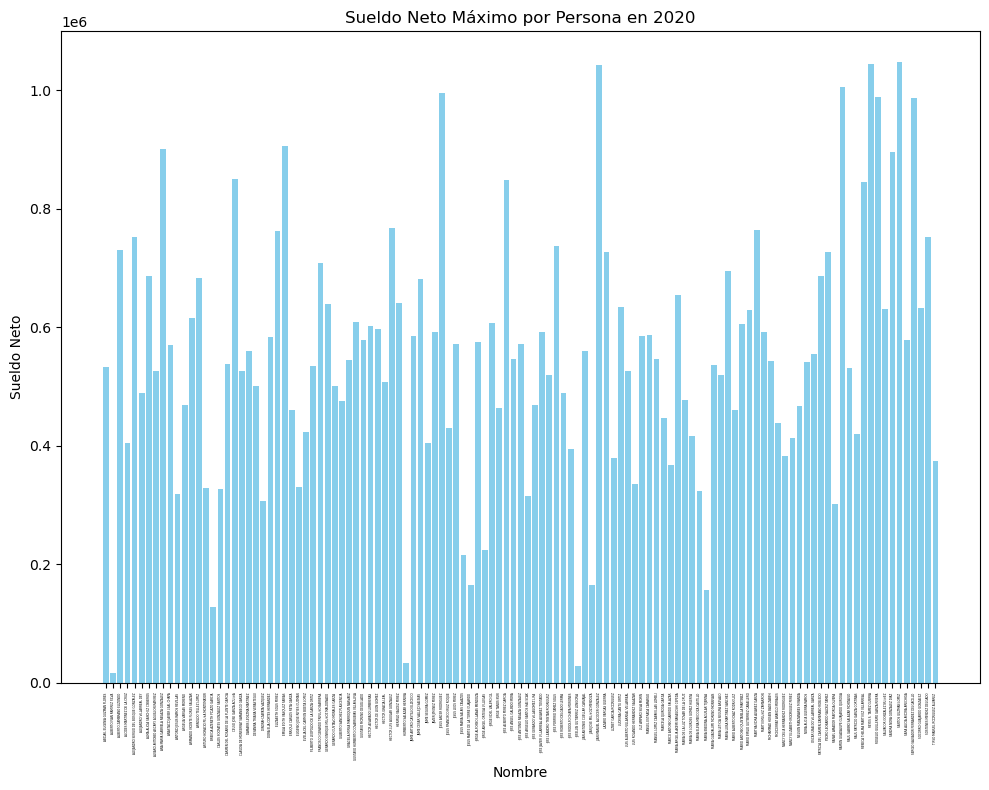

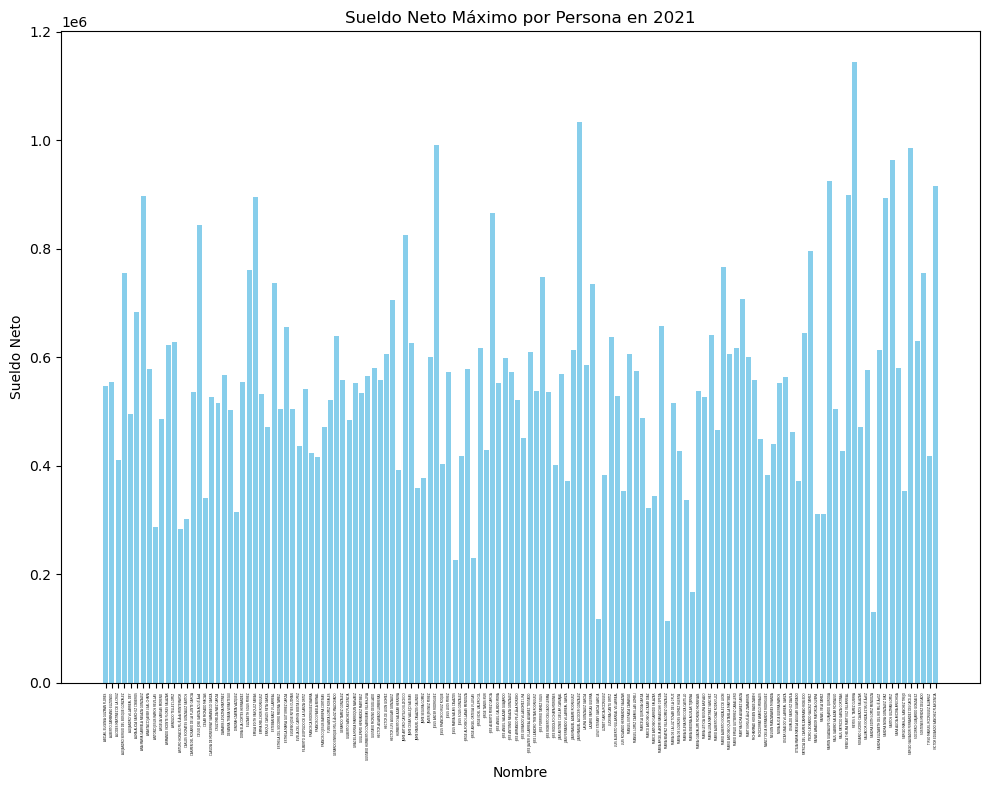

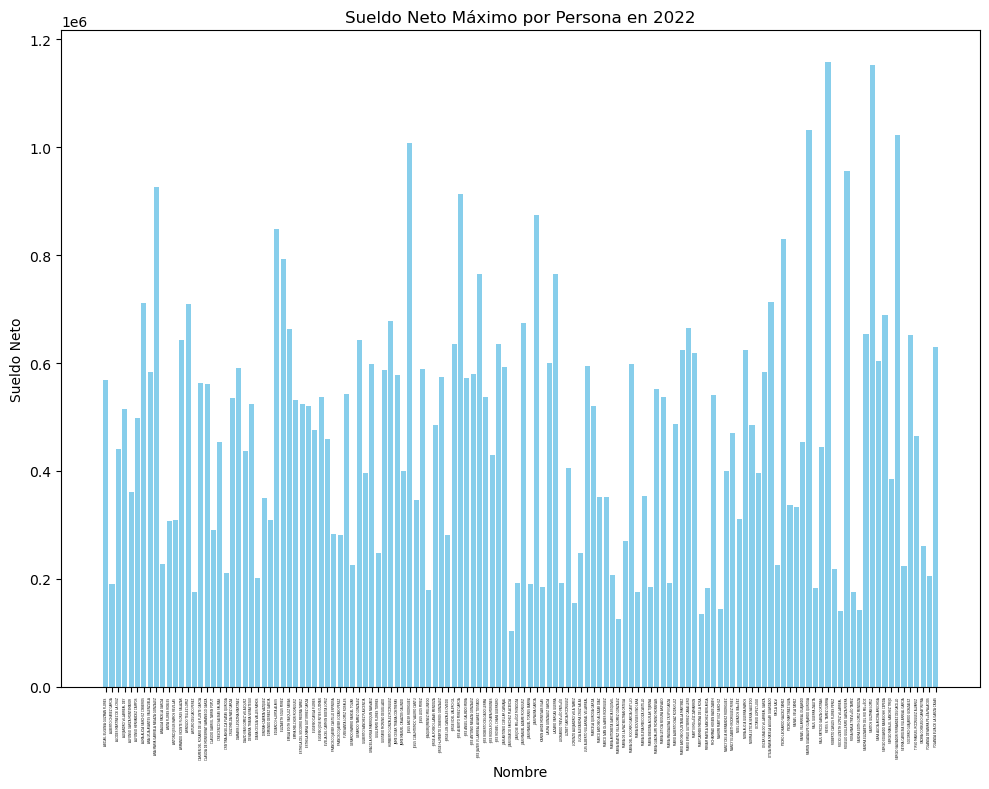

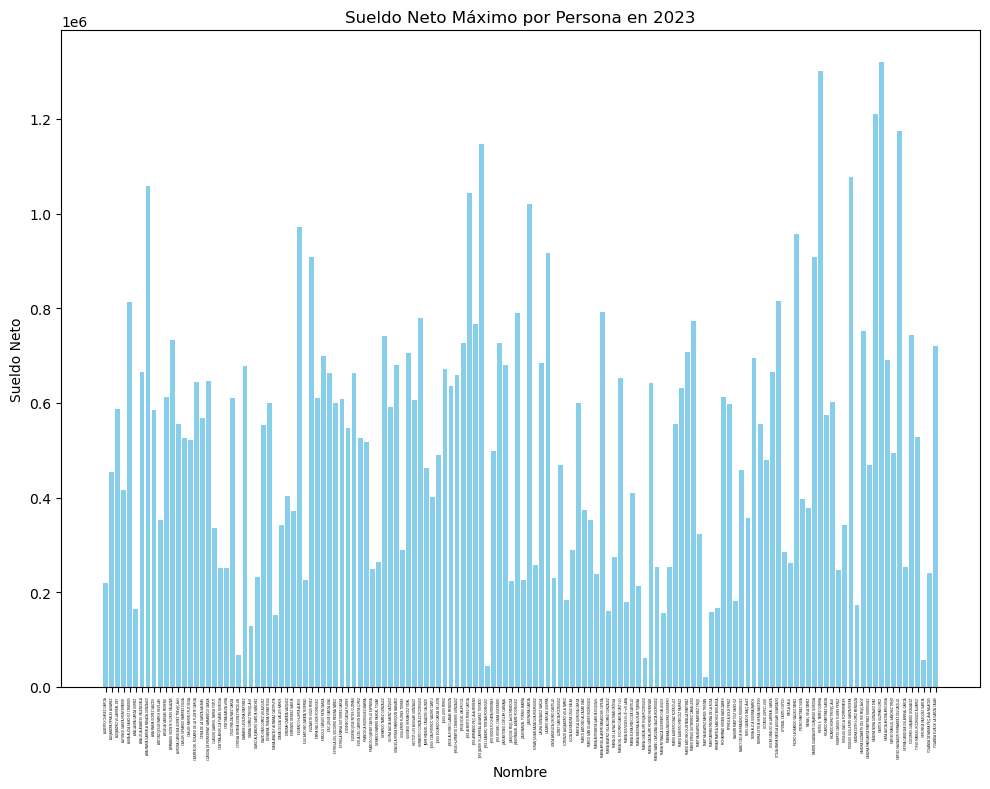

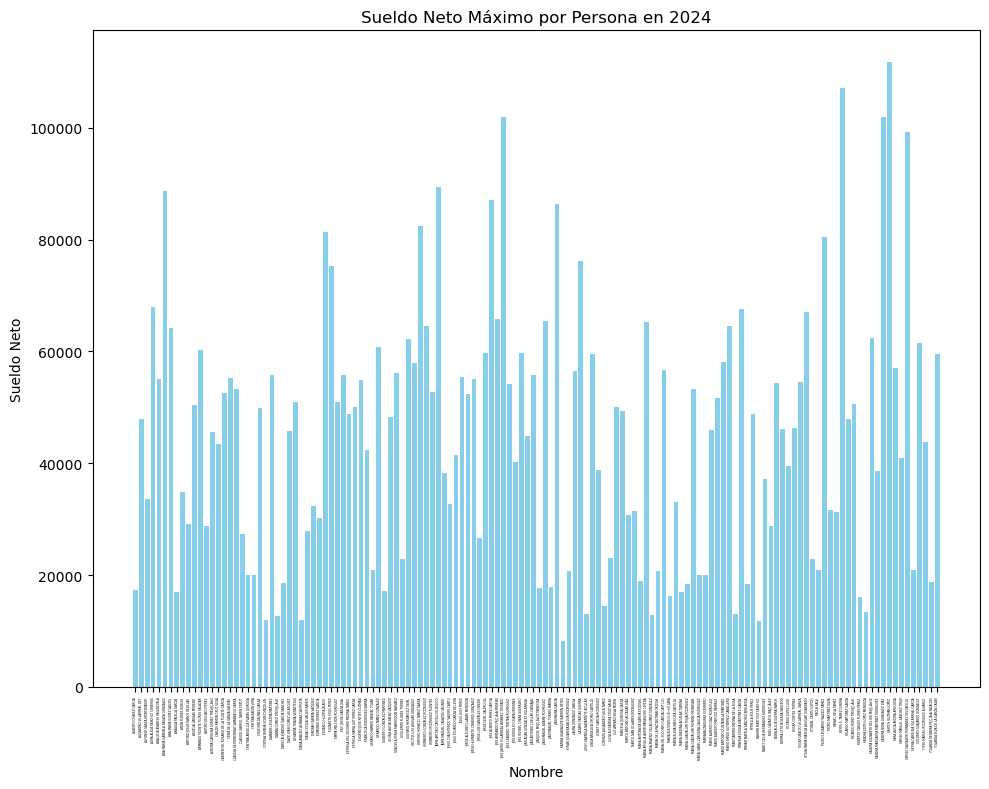

In [39]:
########################################## Punto 3 y 4 ##########################################

######### Ejercicio 1 #########

## Estadísticas descriptivas por conteo de nombres en cada dependencia de cada año (Porcentaje)
# def prepared_data(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(typed_df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["Año", "dependencia"])["Nombre"].nunique().reset_index(name = "Conteo de nombres únicos")
#     df_by_dep = df_by_dep.sort_values(by = ["dependencia", "Año"])
#     unique_years = df_by_dep["Año"].unique()
#     unique_dep = df_by_dep["dependencia"].unique()
#     return df_by_dep, unique_years, unique_dep

# def Organizar(df_by_dep, unique_years, unique_dep):    
#     data_frames = []
    
#     for year in sorted(unique_years):
#         year_filter = df_by_dep[df_by_dep["Año"] == year]   
#         temp_results = []
#         for dep in unique_dep:
#             filtro = year_filter[year_filter["dependencia"] == dep]
#             temp_results.append(filtro) 
    
#         if temp_results:
#            results = pd.concat(temp_results)  
#            results = results.sort_values("Año")
#            data_frames.append(results)
            
#     return data_frames

# def estadísticas_descriptivas(data_frames, unique_years):
#     display(HTML(f"<h2>Estadísticas descriptivas por conteo de nombres en cada dependenca de cada año</h2>"))

#     Anio_lista = []
#     Promedio_lista = []
#     Desv_lista = []
    
#     for i, year in enumerate(sorted(unique_years)): 
#         year_filter = unique_years[i]
#         promedio = data_frames[i]["Conteo de nombres únicos"].mean()
#         desv = data_frames[i]["Conteo de nombres únicos"].std()
#         Anio_lista.append(year_filter)
#         Promedio_lista.append(promedio)
#         Desv_lista.append(desv)

#     resultados1 = pd.DataFrame({
#         "Año": Anio_lista, 
#         "Conteo de Nombres Únicos": Promedio_lista
#     })

#     resultados2 = pd.DataFrame({
#         "Año": Anio_lista, 
#         "Conteo de Nombres Únicos": Desv_lista
#     })

#     display(HTML(f"<h3>Promedio</h3>"))
#     print_tabulate(resultados1)
#     display(HTML(f"<h3>Desviaciones estándar</h3>"))
#     print_tabulate(resultados2)

#     display(HTML(f"<h3>Máximos y Mínimos conteos</h3>"))
#     for i, year in enumerate(sorted(unique_years)):
#         display(HTML(f"<h4>{year}</h4>"))
#         current_df = data_frames[i].drop(columns=['Año']) 
#         Maxi_Mini = current_df.loc[current_df.groupby("dependencia")["Conteo de nombres únicos"].idxmax()].reset_index(drop=True)
#         Maxi_Mini = Maxi_Mini.sort_values(by = ["Conteo de nombres únicos"], ascending = False)
#         total_conteo = Maxi_Mini["Conteo de nombres únicos"].sum()
#         Maxi_Mini["Porcentaje"] = (Maxi_Mini["Conteo de nombres únicos"] / total_conteo) * 100
#         print_tabulate(Maxi_Mini)
        
# df_by_dep, unique_years, unique_dep = prepared_data(typed_df)
# data_frames = Organizar(df_by_dep, unique_years, unique_dep)
# estadísticas_descriptivas(data_frames, unique_years)

## Gráfica de distribución de conteo de nombres en cada dependencia de cada año (Porcentaje)
# def prepared_data2(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(typed_df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["Año", "dependencia"])["Nombre"].nunique().reset_index(name = "Conteo de nombres únicos")
#     df_by_dep = df_by_dep.sort_values(by = ["dependencia", "Año"])
#     anios_unicos = df_by_dep["Año"].unique()
#     dep_unicos = df_by_dep["dependencia"].unique()
#     return df_by_dep, anios_unicos, dep_unicos 
    
# def plot_pie_by_dep(df: pd.DataFrame, anio: int) -> None:
#     fig, ax = plt.subplots(figsize = (10, 7))
#     wedges, texts, autotexts = ax.pie(
#         df["Conteo de nombres únicos"],
#         labels=df["dependencia"],
#         autopct="%1.1f%%",
#         startangle=140,
#         labeldistance=0.8,  
#         pctdistance=0.75,   
#         textprops={"fontsize": 0.5},  
#     )

#     for text in texts:
#         text.set_fontsize(0.5)  
#         text.set_color("black")  
#         x, y = text.get_position()  
#         text.set_ha("right") 
#         text.set_va("center")
#         ax.annotate(
#             "", xy = (x, y), xytext = (x * 1.4, y * 1.4),
#             arrowprops=dict(arrowstyle = "-", color = "black", linewidth = 0.5)
#         )
#         text.set_position((x * 1.4, y * 1.4))

#     plt.title(f"Distribución por dependencia en el año {anio}", loc = "center", x = 0.5, y = 1.05)
#     plt.axis("equal")
#     # plt.savefig(f"img1/bplt_{anio}.png", dpi = 600)
#     plt.show()

# df_by_dep, anios_unicos, dep_unicos  = prepared_data2(typed_df)
# display(HTML(f"<h2>Gráficas:</h2>"))
# for anio in anios_unicos:
#     filas_anio = df_by_dep[df_by_dep["Año"] == anio]
#     Organizar = filas_anio.groupby(["dependencia", "Año"])[["Conteo de nombres únicos"]].sum().reset_index()
#     plot_pie_by_dep(Organizar, anio)

######### Ejercicio 2 #########

## Estadísticas descriptivas de los sueldos netos acumulados de las dependencias con sueldo neto máximo o mínimo
# def prepared_data(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["Nombre", "dependencia", "Año"])[["Sueldo Neto"]].sum().reset_index()
#     unique_years = df_by_dep["Año"].unique()
#     unique_dep = df_by_dep["dependencia"].unique()
#     return df_by_dep, unique_years, unique_dep

# def Organizar(df_by_dep, unique_years, unique_dep):    
#     data_frames = []
    
#     for year in sorted(unique_years):
#         year_filter = df_by_dep[df_by_dep["Año"] == year]   
#         temp_results = []
#         for dep in unique_dep:
#             filtro = year_filter[year_filter["dependencia"] == dep]
#             max_sueldo_neto = filtro["Sueldo Neto"].max()
#             max_sueldo_neto_row = filtro[filtro["Sueldo Neto"] == max_sueldo_neto]
#             temp_results.append(max_sueldo_neto_row) 
    
#         if temp_results:
#            results = pd.concat(temp_results)  
#            results = results.sort_values("Nombre")
#            data_frames.append(results)
            
#     return data_frames

# def find_salary_rows(current_df, year, salary_type = "max"):
#     filtro = current_df[current_df["Año"] == year]
#     if salary_type == "max":
#         sueldo_neto = filtro["Sueldo Neto"].max()
#     else:
#         sueldo_neto = filtro["Sueldo Neto"].min()
#     sueldo_neto_row = filtro[filtro["Sueldo Neto"] == sueldo_neto]
#     return sueldo_neto_row.drop_duplicates()

# def maxi(data_frames, unique_years):
#     dependencia_maximos = []
    
#     for i, year in enumerate(unique_years):
#         current_df = data_frames[i]
#         max_sueldo_neto_row = find_salary_rows(current_df, year, "max")
#         max_sueldo_neto_row = max_sueldo_neto_row.drop(columns = ["Nombre"])
#         dependencia_maximos.append(max_sueldo_neto_row)
    
#     if dependencia_maximos:
#         results_maximo = pd.concat(dependencia_maximos)
#     display(HTML(f"<h2>Dependencias con sueldo neto máximo:</h2>"))
#     print_tabulate(results_maximo)
#     return results_maximo

# def estadísticas_descriptivas_maxi(df, results_maximo):
#     display(HTML(f"<h2>Estadísticas descriptivas de las dependencias (sueldo neto acumulado)</h2>"))
#     nom_uni_max = results_maximo["dependencia"].unique()
    
#     for unique_dep in nom_uni_max:
#         Buscado = df[df["dependencia"] == unique_dep]["Sueldo Neto"]
#         media = Buscado.mean() 
#         dev_est = Buscado.std()
#         alto = Buscado.max()
#         bajo = Buscado.min()

#         display(HTML(f"<h3>{unique_dep}</h3>"))
#         display(HTML(f"<h4>Promedio: {media:.2f}</h4>"))
#         display(HTML(f"<h4>Desviación estándar: {dev_est:.2f}</h4>"))
#         display(HTML(f"<h4>Máximo: {alto:.2f}</h4>"))
#         display(HTML(f"<h4>Mínimo: {bajo:.2f}</h4>"))
#         print("\n")

# def mini(data_frames, unique_years):
#     dependencia_minimos = []
    
#     for i, year in enumerate(unique_years):
#         current_df = data_frames[i]
#         min_sueldo_neto_row = find_salary_rows(current_df, year, "min")
#         min_sueldo_neto_row = min_sueldo_neto_row.drop(columns = ["Nombre"])
#         dependencia_minimos.append(min_sueldo_neto_row)
    
#     if dependencia_minimos:
#         results_minimo = pd.concat(dependencia_minimos)
#     display(HTML(f"<h2>Dependencias con sueldo neto mínimo:</h2>"))
#     print_tabulate(results_minimo)
#     return results_minimo

# def estadísticas_descriptivas_mini(df, results_minimo):
#     display(HTML(f"<h2>Estadísticas descriptivas de las dependencias (sueldo neto acumulado)</h2>"))
#     nom_uni_min = results_minimo["dependencia"].unique()
    
#     for unique_dep in nom_uni_min:
#         Buscado = df[df["dependencia"] == unique_dep]["Sueldo Neto"]
#         media = Buscado.mean() 
#         dev_est = Buscado.std()
#         alto = Buscado.max()
#         bajo = Buscado.min()

#         display(HTML(f"<h3>{unique_dep}</h3>"))
#         display(HTML(f"<h4>Promedio: {media:.2f}</h4>"))
#         display(HTML(f"<h4>Desviación estándar: {dev_est:.2f}</h4>"))
#         display(HTML(f"<h4>Máximo: {alto:.2f}</h4>"))
#         display(HTML(f"<h4>Mínimo: {bajo:.2f}</h4>"))
#         print("\n")

# df_by_dep, unique_years, unique_dep = prepared_data(typed_df) 
# data_frames = Organizar(df_by_dep, unique_years, unique_dep)
# results_maximo = maxi(data_frames, unique_years) 
# estadísticas_descriptivas_maxi(typed_df, results_maximo)
# results_minimo = mini(data_frames, unique_years) 
# estadísticas_descriptivas_mini(typed_df, results_minimo)

## Gráfica de la evolución de los sueldos netos acumulados por dependencia a través de los años registrados en la base de datos
# def prepared_data_2(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(typed_df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["dependencia", "Año"])[["Sueldo Neto"]].sum().reset_index()
#     unique_dep = df_by_dep["dependencia"].unique()
#     return df_by_dep, unique_dep

# def plot_by_dep(df: pd.DataFrame, dep:str) -> None:
#     filtered_df = df[df["dependencia"] == dep]
#     plt.figure(figsize = (10, 5)) 
#     plt.plot(filtered_df["Año"], filtered_df["Sueldo Neto"], marker = "o", color = "blue")
#     plt.title(f"Sueldo Neto acumulado para {dep}")
#     plt.xlabel("Año")
#     plt.ylabel("Sueldo Neto")
#     plt.grid(True)
#     #plt.savefig(f"img2/bplt_{dep.replace(" ", "_")}.png") 
#     plt.show()

# df_by_dep, unique_dep = prepared_data_2(typed_df)
# display(HTML(f"<h2>Gráficas:</h2>"))
# for dep in unique_dep:
# plot_by_dep(df_by_dep, dep)

######### Ejercicio 3 #########

## Estadísticas descriptivas de los sueldos netos acumulados de los nombres con sueldo neto máximo o mínimo
# def prepared_data(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["Nombre", "dependencia", "Año"])[["Sueldo Neto"]].sum().reset_index()
#     unique_years = df_by_dep["Año"].unique()
#     unique_dep = df_by_dep["dependencia"].unique()
#     unique_nom = df_by_dep["Nombre"].unique()
#     return df_by_dep, unique_years, unique_dep, unique_nom

# def Organizar(df_by_dep, unique_years, unique_dep):    
#     data_frames = []
    
#     for year in sorted(unique_years):
#         year_filter = df_by_dep[df_by_dep["Año"] == year]   
#         temp_results = []
#         for dep in unique_dep:
#             filtro = year_filter[year_filter["dependencia"] == dep]
#             max_sueldo_neto = filtro["Sueldo Neto"].max()
#             max_sueldo_neto_row = filtro[filtro["Sueldo Neto"] == max_sueldo_neto]
#             temp_results.append(max_sueldo_neto_row) 
    
#         if temp_results:
#            results = pd.concat(temp_results)  
#            results = results.sort_values("Nombre")
#            data_frames.append(results)
            
#     return data_frames

# def find_salary_rows(current_df, year, salary_type = "max"):
#     filtro = current_df[current_df["Año"] == year]
#     if salary_type == "max":
#         sueldo_neto = filtro["Sueldo Neto"].max()
#     else:
#         sueldo_neto = filtro["Sueldo Neto"].min()
#     sueldo_neto_row = filtro[filtro["Sueldo Neto"] == sueldo_neto]
#     return sueldo_neto_row.drop_duplicates()

# def maxi(data_frames, unique_years):
#     Nombre_maximos = []
    
#     for i, year in enumerate(unique_years):
#         current_df = data_frames[i]
#         max_sueldo_neto_row = find_salary_rows(current_df, year, "max")
#         max_sueldo_neto_row = max_sueldo_neto_row.drop(columns = ["dependencia"])
#         Nombre_maximos.append(max_sueldo_neto_row)
    
#     if Nombre_maximos:
#         results_maximo = pd.concat(Nombre_maximos)
#     display(HTML(f"<h2>Nombres con sueldo neto máximo:</h2>"))
#     print_tabulate(results_maximo)
#     return results_maximo

# def estadísticas_descriptivas_maxi(df, results_maximo):
#     display(HTML(f"<h2>Estadísticas descriptivas de los nombres (sueldo neto acumulado)</h2>"))
#     nom_uni_max = results_maximo["Nombre"].unique()
    
#     for unique_nom in nom_uni_max:
#         Buscado = df[df["Nombre"] == unique_nom]["Sueldo Neto"]
#         media = Buscado.mean() 
#         dev_est = Buscado.std()
#         alto = Buscado.max()
#         bajo = Buscado.min()

#         display(HTML(f"<h3>{unique_nom}</h3>"))
#         display(HTML(f"<h4>Promedio: {media:.2f}</h4>"))
#         display(HTML(f"<h4>Desviación estándar: {dev_est:.2f}</h4>"))
#         display(HTML(f"<h4>Máximo: {alto:.2f}</h4>"))
#         display(HTML(f"<h4>Mínimo: {bajo:.2f}</h4>"))
#         print("\n")

# def mini(data_frames, unique_years):
#     Nombre_minimos = []
    
#     for i, year in enumerate(unique_years):
#         current_df = data_frames[i]
#         min_sueldo_neto_row = find_salary_rows(current_df, year, "min")
#         min_sueldo_neto_row = min_sueldo_neto_row.drop(columns = ["dependencia"])
#         Nombre_minimos.append(min_sueldo_neto_row)
    
#     if Nombre_minimos:
#         results_minimo = pd.concat(Nombre_minimos)
#     display(HTML(f"<h2>Nombres con sueldo neto mínimo:</h2>"))
#     print_tabulate(results_minimo)
#     return results_minimo

# def estadísticas_descriptivas_mini(df, results_minimo):
#     display(HTML(f"<h2>Estadísticas descriptivas de los nombres (sueldo neto acumulado)</h2>"))
#     nom_uni_min = results_minimo["Nombre"].unique()
    
#     for unique_nom in nom_uni_min:
#         Buscado = df[df["Nombre"] == unique_nom]["Sueldo Neto"]
#         media = Buscado.mean() 
#         dev_est = Buscado.std()
#         alto = Buscado.max()
#         bajo = Buscado.min()

#         display(HTML(f"<h3>{unique_nom}</h3>"))
#         display(HTML(f"<h4>Promedio: {media:.2f}</h4>"))
#         display(HTML(f"<h4>Desviación estándar: {dev_est:.2f}</h4>"))
#         display(HTML(f"<h4>Máximo: {alto:.2f}</h4>"))
#         display(HTML(f"<h4>Mínimo: {bajo:.2f}</h4>"))
#         print("\n")

# df_by_dep, unique_years, unique_dep, unique_nom = prepared_data(typed_df) 
# data_frames = Organizar(df_by_dep, unique_years, unique_dep)
# results_maximo = maxi(data_frames, unique_years) 
# estadísticas_descriptivas_maxi(typed_df, results_maximo)
# results_minimo = mini(data_frames, unique_years) 
# estadísticas_descriptivas_mini(typed_df, results_minimo)

# ## Gráfica de la evolución de los sueldos netos acumulados por nombres a través de los años registrados en la base de datos
# def prepared_data_2(df: pd.DataFrame):
#     df["Fecha"] = pd.to_datetime(typed_df["Fecha"])
#     df["Año"] = df["Fecha"].dt.year
#     df_by_dep = df.groupby(["dependencia", "Año"])[["Sueldo Neto"]].sum().reset_index()
#     unique_years = df_by_dep["Año"].unique()
#     return unique_years

# def plot_by_name(df: pd.DataFrame, year: int) -> None:
#     plt.figure(figsize = (10, 8)) 
#     plt.bar(current_df["Nombre"], current_df["Sueldo Neto"], color = "skyblue")  
#     plt.xlabel("Nombre")
#     plt.ylabel("Sueldo Neto")
#     plt.title(f"Sueldo Neto Máximo por Persona en {year}")
#     plt.xticks(rotation = 90, fontsize = 2) 
#     plt.tight_layout() 
#     #plt.savefig(f"img3/bplt_sueldo_neto_{year}.png", dpi = 300)  
#     plt.show()

# unique_years = prepared_data_2(typed_df)
# display(HTML(f"<h2>Gráficas:</h2>"))
# for i, year in enumerate(sorted(unique_years)):
#     current_df = data_frames[i]
#     plot_by_name(current_df, year)

In [269]:
#Curiosidades del ejercicio 1

# def curiosidad(unique_years, data_frames):
#     data_frames2 = []
    
#     dependencias1 = [
#         "FAC. DE ING. MECANICA Y ELECTRICA",
#         "FAC. DE CONTADURIA PUBLICA Y ADMON.",
#         "FAC. DE CIENCIAS QUIMICAS",
#         "FAC. DE CIENCIAS BIOLOGICAS",
#         "FACULTAD DE DERECHO Y CRIMINOLOGIA",
#         "FAC. DE FILOSOFIA Y LETRAS",
#         "FAC. DE CIENCIAS FISICO-MATEMATICAS",
#         "FAC. DE ING. CIVIL",
#         "FAC. DE ORGANIZACION DEPORTIVA",
#         "FACULTAD DE TRABAJO SOCIAL Y DESARROLLO HUMANO",
#         "FAC. DE ARQUITECTURA"
#     ]
    
#     dependencias2 = [
#         "FAC. DE MEDICINA",
#         "FACULTAD DE SALUD PUBLICA Y NUTRICION",
#         "FAC. DE ENFERMERIA",
#         "FAC. DE ODONTOLOGIA",
#         "FAC. DE PSICOLOGIA",
#     ]
    
#     for year, current_df in zip(unique_years, data_frames):
#         Facs = [current_df[current_df["dependencia"] == dep] for dep in dependencias1]
#         Facs2 = [current_df[current_df["dependencia"] == dep] for dep in dependencias2]
    
#         if Facs or Facs2:
#            results1 = pd.concat(Facs)
#            results2 = pd.concat(Facs2)  
#            results1 = results1.sort_values(by = ["Conteo de nombres únicos"], ascending = False)
#            results2 = results2.sort_values(by = ["Conteo de nombres únicos"], ascending = False)
#            results1 = results1.drop(columns=['Año'])
#            results2 = results2.drop(columns=['Año'])
#            data_frames2.append((year, results1, results2))

#     return data_frames2

# def print_data_frames2(data_frames2):
#     for year, results1, results2 in data_frames2:
#         display(HTML(f"<h3>{year}</h3>"))
#         display(HTML(f"<h4>Campus Ciudad Universitaria:</h4>"))
#         print_tabulate(results1)
#         Suma1 = results1["Conteo de nombres únicos"].sum()
#         display(HTML(f"<h4>Suma total: {Suma1}</h4>"))
#         display(HTML(f"<h4>Campus Ciencias de la Salud:</h4>"))
#         print_tabulate(results2)
#         Suma2 = results2["Conteo de nombres únicos"].sum()
#         display(HTML(f"<h4>Suma total: {Suma2}</h4>"))
#         print("\n")

# data_frames2 = curiosidad(unique_years, data_frames)
# print_data_frames2(data_frames2)

dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,774
FAC. DE ARQUITECTURA,411
FAC. DE CONTADURIA PUBLICA Y ADMON.,410
FAC. DE CIENCIAS QUIMICAS,390
FAC. DE CIENCIAS BIOLOGICAS,359
FACULTAD DE DERECHO Y CRIMINOLOGIA,354
FAC. DE FILOSOFIA Y LETRAS,278
FAC. DE CIENCIAS FISICO-MATEMATICAS,240
FAC. DE ING. CIVIL,194
FAC. DE ORGANIZACION DEPORTIVA,154


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,764
FAC. DE PSICOLOGIA,195
FAC. DE ODONTOLOGIA,180
FACULTAD DE SALUD PUBLICA Y NUTRICION,150
FAC. DE ENFERMERIA,125


dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,791
FAC. DE CONTADURIA PUBLICA Y ADMON.,443
FAC. DE ARQUITECTURA,425
FAC. DE CIENCIAS QUIMICAS,396
FAC. DE CIENCIAS BIOLOGICAS,376
FACULTAD DE DERECHO Y CRIMINOLOGIA,362
FAC. DE FILOSOFIA Y LETRAS,292
FAC. DE CIENCIAS FISICO-MATEMATICAS,250
FAC. DE ING. CIVIL,199
FAC. DE ORGANIZACION DEPORTIVA,171


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,767
FAC. DE PSICOLOGIA,198
FAC. DE ODONTOLOGIA,179
FACULTAD DE SALUD PUBLICA Y NUTRICION,159
FAC. DE ENFERMERIA,134


dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,779
FAC. DE CONTADURIA PUBLICA Y ADMON.,451
FAC. DE ARQUITECTURA,403
FAC. DE CIENCIAS QUIMICAS,385
FACULTAD DE DERECHO Y CRIMINOLOGIA,367
FAC. DE CIENCIAS BIOLOGICAS,363
FAC. DE FILOSOFIA Y LETRAS,273
FAC. DE CIENCIAS FISICO-MATEMATICAS,250
FAC. DE ING. CIVIL,191
FAC. DE ORGANIZACION DEPORTIVA,168


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,745
FAC. DE PSICOLOGIA,200
FAC. DE ODONTOLOGIA,179
FACULTAD DE SALUD PUBLICA Y NUTRICION,156
FAC. DE ENFERMERIA,129


dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,754
FAC. DE CONTADURIA PUBLICA Y ADMON.,470
FAC. DE ARQUITECTURA,380
FAC. DE CIENCIAS QUIMICAS,379
FAC. DE CIENCIAS BIOLOGICAS,370
FACULTAD DE DERECHO Y CRIMINOLOGIA,366
FAC. DE FILOSOFIA Y LETRAS,279
FAC. DE CIENCIAS FISICO-MATEMATICAS,265
FAC. DE ING. CIVIL,193
FAC. DE ORGANIZACION DEPORTIVA,179


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,728
FAC. DE PSICOLOGIA,205
FAC. DE ODONTOLOGIA,173
FACULTAD DE SALUD PUBLICA Y NUTRICION,151
FAC. DE ENFERMERIA,124


dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,776
FAC. DE CONTADURIA PUBLICA Y ADMON.,504
FAC. DE ARQUITECTURA,404
FACULTAD DE DERECHO Y CRIMINOLOGIA,387
FAC. DE CIENCIAS BIOLOGICAS,364
FAC. DE CIENCIAS QUIMICAS,360
FAC. DE CIENCIAS FISICO-MATEMATICAS,301
FAC. DE FILOSOFIA Y LETRAS,276
FAC. DE ING. CIVIL,190
FAC. DE ORGANIZACION DEPORTIVA,183


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,791
FAC. DE PSICOLOGIA,207
FAC. DE ODONTOLOGIA,171
FACULTAD DE SALUD PUBLICA Y NUTRICION,152
FAC. DE ENFERMERIA,128


dependencia,Conteo de nombres únicos
FAC. DE ING. MECANICA Y ELECTRICA,675
FAC. DE CONTADURIA PUBLICA Y ADMON.,408
FAC. DE CIENCIAS BIOLOGICAS,296
FACULTAD DE DERECHO Y CRIMINOLOGIA,271
FAC. DE CIENCIAS QUIMICAS,262
FAC. DE ARQUITECTURA,222
FAC. DE FILOSOFIA Y LETRAS,207
FAC. DE CIENCIAS FISICO-MATEMATICAS,178
FAC. DE ORGANIZACION DEPORTIVA,156
FAC. DE ING. CIVIL,153


dependencia,Conteo de nombres únicos
FAC. DE MEDICINA,741
FAC. DE PSICOLOGIA,148
FAC. DE ODONTOLOGIA,146
FACULTAD DE SALUD PUBLICA Y NUTRICION,109
FAC. DE ENFERMERIA,96


In [73]:
#Extra del ejercicio 3
# for year, Ordenar in zip(unique_years, data_frames):
#     display(HTML(f"<h3>{year}</h3>"))
#     Ordenar = Ordenar.sort_values(by = ["Sueldo Neto"], ascending = False).drop(columns = ["Año"]) 
#     print_tabulate(Ordenar.head(5))

Nombre,dependencia,Sueldo Neto
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,86245.29
JUAN MANUEL ALCOCER GONZALEZ,SRIA. DE INVESTIGACI√ìN CIENT√çFICA Y DESARROLLO TECNOL√ìGICO,81221.97
SANTOS GUZMAN LOPEZ,SECRETARIA GENERAL,81117.27
RAMON GUADALUPE GUAJARDO QUIROGA,SECRETARIA DE DESARROLLO AGROPECUARIO,77659.45
SERGIO SALVADOR FERNANDEZ DELGADILLO,SECRETARIA DE SUSTENTABILIDAD,76567.18


Nombre,dependencia,Sueldo Neto
SANTOS GUZMAN LOPEZ,SECRETARIA GENERAL,1046972.92
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,1044741.31
JUAN MANUEL ALCOCER GONZALEZ,SRIA. DE INVESTIGACI√ìN CIENT√çFICA Y DESARROLLO TECNOL√ìGICO,1043071.37
RAMON GUADALUPE GUAJARDO QUIROGA,SECRETARIA DE DESARROLLO AGROPECUARIO,1005686.43
JESUS ANCER RODRIGUEZ,FAC. DE MEDICINA,994658.69


Nombre,dependencia,Sueldo Neto
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,1143632.22
JUAN MANUEL ALCOCER GONZALEZ,SRIA. DE INVESTIGACI√ìN CIENT√çFICA Y DESARROLLO TECNOL√ìGICO,1034435.12
JESUS ANCER RODRIGUEZ,FAC. DE MEDICINA,991446.14
SERGIO SALVADOR FERNANDEZ DELGADILLO,SECRETARIA DE SUSTENTABILIDAD,986367.74
SANTOS GUZMAN LOPEZ,SECRETARIA GENERAL,964551.69


Nombre,dependencia,Sueldo Neto
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,1158449.85
SANTOS GUZMAN LOPEZ,RECTORIA,1153066.94
RAMON GUADALUPE GUAJARDO QUIROGA,FAC. DE AGRONOMIA,1031450.12
SERGIO SALVADOR FERNANDEZ DELGADILLO,SECRETARIA DE SUSTENTABILIDAD,1022023.43
JESUS ANCER RODRIGUEZ,FAC. DE MEDICINA,1006921.83


Nombre,dependencia,Sueldo Neto
SANTOS GUZMAN LOPEZ,RECTORIA,1321187.87
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,1300816.91
SANDRA NORA GONZALEZ DIAZ,FAC. DE MEDICINA,1210945.65
SERGIO SALVADOR FERNANDEZ DELGADILLO,SECRETARIA DE SUSTENTABILIDAD,1175025.28
JOSE JAVIER VILLARREAL ALVAREZ TOSTADO,FAC. DE FILOSOFIA Y LETRAS,1146391.50


Nombre,dependencia,Sueldo Neto
SANTOS GUZMAN LOPEZ,RECTORIA,111868.46
REYES S. TAMEZ GUERRA,FAC. DE CIENCIAS BIOLOGICAS,107217.26
JOSE JAVIER VILLARREAL ALVAREZ TOSTADO,FAC. DE FILOSOFIA Y LETRAS,102037.77
SANDRA NORA GONZALEZ DIAZ,FAC. DE MEDICINA,102037.77
SERGIO SALVADOR FERNANDEZ DELGADILLO,SECRETARIA DE SUSTENTABILIDAD,99316.21


In [71]:
########################################## Punto 5 ##########################################

######### Datos del ejercicio 3 #########
# def Kolmogorov_Smirnov(unique_years):
#     display(HTML(f"<h2>Prueba de normalidad</h2>"))
#     for i, year in enumerate(sorted(unique_years)):
#         current_df = data_frames[i]
#         data = current_df["Sueldo Neto"]
#         stat, p = kstest(data, "norm")
#         display(HTML(f"<h4>Año: {year}, Estadístico de la prueba Kolmogorov-Smirnov: {stat}, p-valor: {p:.10f}</h4>"))
        
#     if p > 0.05:
#         display(HTML(f"<h3>H0: Los datos siguen una distribución normal</h3>"))
#     else:
#         display(HTML(f"<h3>H1: Los datos no siguen una distribución normal</h3>"))
    
#     print("\n\n")

# def Kruskal_Wallis(unique_years):
#     display(HTML(f"<h2>Prueba de significancia</h2>"))
#     grouped_data = []
    
#     for i, year in enumerate(sorted(unique_years)):
#         current_df = data_frames[i]
#         data = current_df["Sueldo Neto"]
#         grouped_data.append(data)
    
#     stat, p = kruskal(*grouped_data)    
#     display(HTML(f"<h4>Estadístico de la prueba Kruskal-Wallis: {stat}, p-valor: {p:.10f}</h4>")) 
        
#     if p > 0.05:
#         display(HTML(f"<h3>H0: No hay diferencias significativas entre los grupos</h3>"))
#     else:
#         display(HTML(f"<h3>H1: Hay diferencias significativas entre los grupos</h3>"))
        
#     print("\n\n")

#     display(HTML(f"<h2>Prueba Tukey</h2>"))
#     if p <= 0.05:
#         all_data = pd.concat(grouped_data, keys = sorted(unique_years)).reset_index()
#         all_data.columns = ["Año", "Índice", "Sueldo Neto"]
#         tukey = pairwise_tukeyhsd(endog = all_data["Sueldo Neto"], groups = all_data["Año"], alpha = 0.05)
#     display(HTML(tukey.summary().as_html()))
#     display(HTML(f"<h3>No hay una diferencia estadística significativa entre las medias</h3>"))
#     display(HTML(f"<h3>de los sueldo netos de los años 2022 y 2024; ellos son la pareja diferente</h3>"))

# unique_years = prepared_data_2(typed_df)
# Kolmogorov_Smirnov(unique_years)
# Kruskal_Wallis(unique_years)

group1,group2,meandiff,p-adj,lower,upper,reject
2019,2020,1309.5179,0.0,1076.1631,1542.8728,True
2019,2021,3374.2098,0.0,3139.8698,3608.5498,True
2019,2022,4651.2093,0.0,4416.3166,4886.102,True
2019,2023,5568.9492,0.0,5334.8876,5803.0108,True
2019,2024,4731.002,0.0,4397.478,5064.5259,True
2020,2021,2064.6919,0.0,1968.7788,2160.605,True
2020,2022,3341.6914,0.0,3244.4358,3438.947,True
2020,2023,4259.4313,0.0,4164.2004,4354.6622,True
2020,2024,3421.484,0.0,3165.5108,3677.4573,True
2021,2022,1276.9995,0.0,1177.4033,1376.5957,True
